In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

data = pd.read_excel('consumo_results.xlsx')
df = pd.DataFrame(data)
print(df['delta'].head().to_string())

0    {'cpu_percent': 0.7000000000000011, 'ram_mb': ...
1    {'cpu_percent': 16.8, 'ram_mb': 1.546875, 'gpu...
2    {'cpu_percent': 1.9000000000000004, 'ram_mb': ...
3    {'cpu_percent': -17.5, 'ram_mb': 0.15625, 'gpu...
4    {'cpu_percent': -2.5, 'ram_mb': 0.203125, 'gpu...


# Extraer de la columna delta, la informacion de CPU, GPU y RAM

In [2]:
# Verificar si 'delta' es string y convertirlo a diccionario
if isinstance(df['delta'].iloc[0], str):
    try:
        df['delta'] = df['delta'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    except (ValueError, SyntaxError) as e:
        print(f"Error al convertir 'delta': {e}")
        # Si falla, asignar diccionarios vacíos para evitar errores
        df['delta'] = df['delta'].apply(lambda x: {} if isinstance(x, str) else x)

# Crear nuevo DataFrame con las columnas deseadas
nuevo_df = pd.DataFrame()
nuevo_df['threshold'] = df['threshold']  # Copiar la columna original

# Extraer 'cpu_percent' y 'ram_mb' del diccionario (manejo seguro con .get())
nuevo_df['cpu_percent'] = df['delta'].apply(lambda x: x.get('cpu_percent', 0))  # 0 si no existe
nuevo_df['ram_mb'] = df['delta'].apply(lambda x: x.get('ram_mb', 0))  # 0 si no existe

# Mostrar el resultado
print(nuevo_df.head())

   threshold  cpu_percent    ram_mb
0        0.1          0.7 -4.093750
1        0.1         16.8  1.546875
2        0.1          1.9  2.562500
3        0.1        -17.5  0.156250
4        0.1         -2.5  0.203125


In [3]:
cpu_stats = nuevo_df.groupby('threshold')['cpu_percent'].describe()
print(cpu_stats.to_string())

            count      mean       std   min  25%  50%  75%   max
threshold                                                       
0.1        1846.0 -0.256067  8.275779 -81.2 -3.5  0.0  2.6  68.7
0.5        1846.0 -0.055796  7.317135 -50.6 -3.3  0.0  2.7  80.5
0.9        1846.0 -0.051625  8.431777 -76.8 -3.4  0.0  2.5  93.7


In [4]:
ram_stats = nuevo_df.groupby('threshold')['ram_mb'].describe()
print(ram_stats.to_string())

            count      mean       std        min  25%       50%       75%       max
threshold                                                                          
0.1        1846.0 -0.041830  2.415825 -39.937500  0.0  0.015625  0.046875  48.40625
0.5        1846.0 -0.005832  1.737641 -13.234375  0.0  0.015625  0.031250  43.12500
0.9        1846.0 -0.050938  2.575279 -47.968750  0.0  0.015625  0.031250  51.31250


/var/folders/_q/szr0xx2x2574ld56dn__98zc0000gn/T/ipykernel_4067/2746835499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


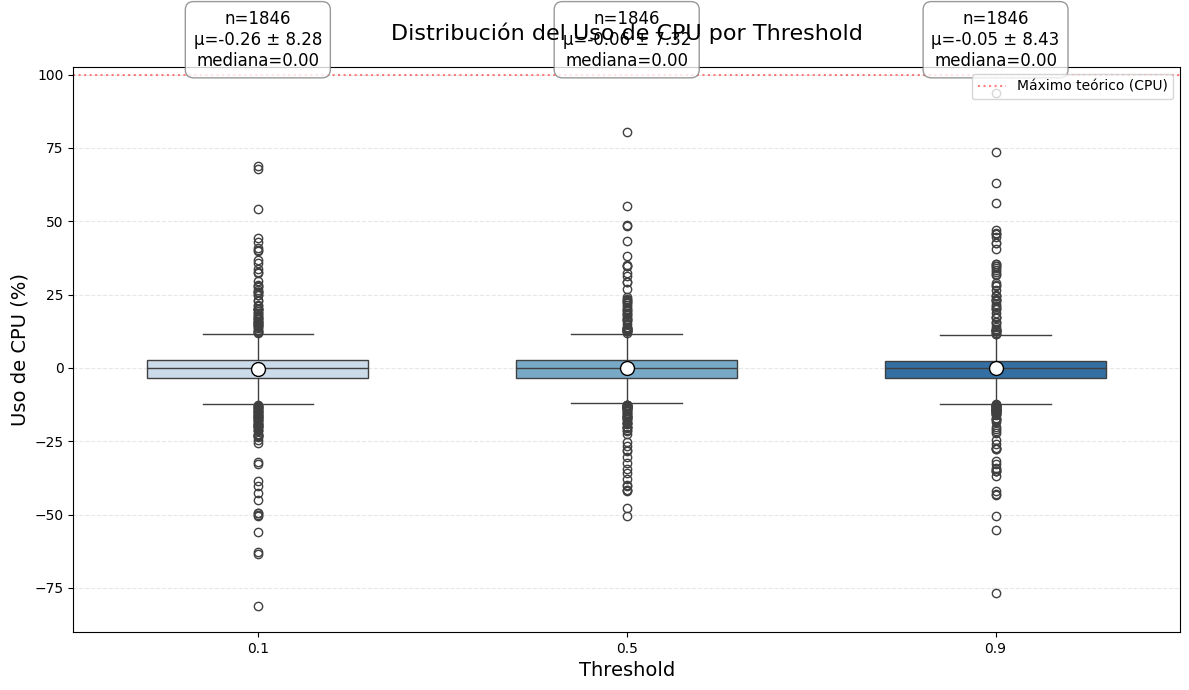

In [5]:
plt.figure(figsize=(12, 7))  # Tamaño aumentado

# Boxplot agrupado por threshold
sns.boxplot(
    data=nuevo_df,
    x='threshold',
    y='cpu_percent',
    palette='Blues',  # Paleta de colores azules
    showmeans=True,
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10  # Marcador más grande
    },
    width=0.6  # Ancho de las cajas
)

# Personalización avanzada
plt.title('Distribución del Uso de CPU por Threshold', fontsize=16, pad=20)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Uso de CPU (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Usamos resources_stats para las anotaciones
for i, threshold in enumerate(cpu_stats.index):
    mean_val = cpu_stats.loc[threshold, 'mean']
    median_val = cpu_stats.loc[threshold, '50%']
    std_val = cpu_stats.loc[threshold, 'std']
    count = cpu_stats.loc[threshold, 'count']
    
    plt.text(
        i, 
        nuevo_df['cpu_percent'].max() * 1.1,  # Posición arriba del máximo
        f"n={int(count)}\nμ={mean_val:.2f} ± {std_val:.2f}\nmediana={median_val:.2f}",
        ha='center',
        fontsize=12,
        bbox=dict(
            facecolor='white',
            alpha=0.8,
            edgecolor='gray',
            boxstyle='round,pad=0.5'
        )
    )

# Línea horizontal de referencia para CPU
plt.axhline(
    y=100, 
    color='red', 
    linestyle=':', 
    alpha=0.5, 
    label='Máximo teórico (CPU)'
)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/var/folders/_q/szr0xx2x2574ld56dn__98zc0000gn/T/ipykernel_4067/1089979460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


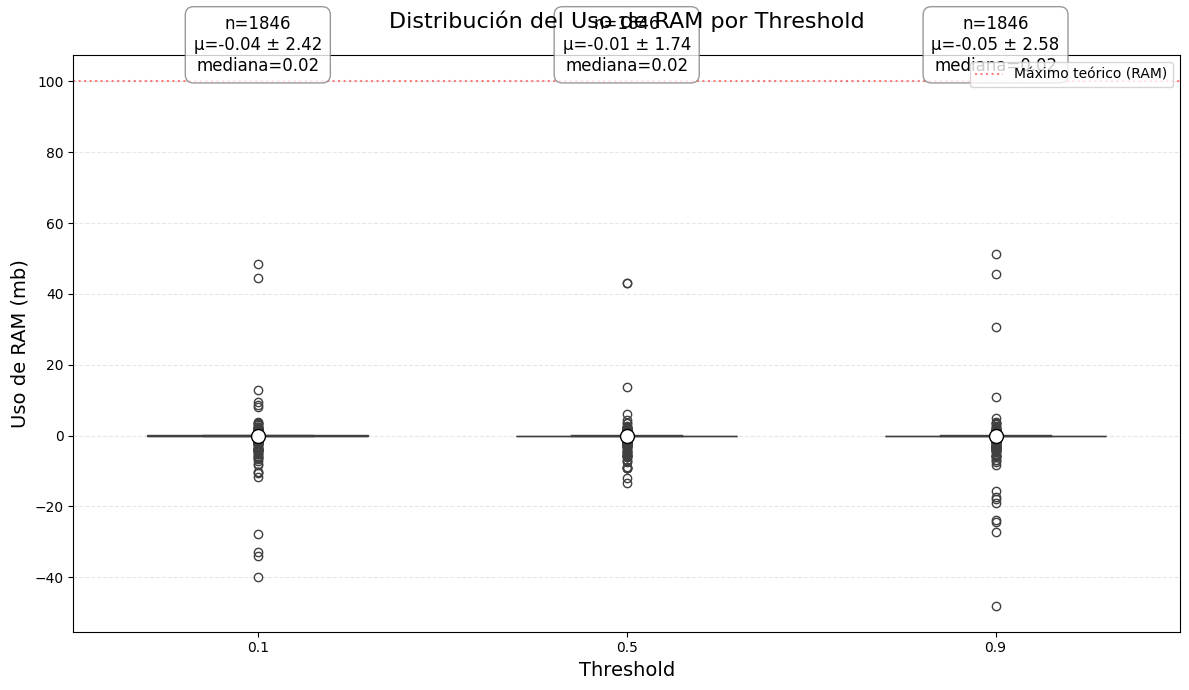

In [6]:
plt.figure(figsize=(12, 7))  # Tamaño aumentado

# Boxplot agrupado por threshold
sns.boxplot(
    data=nuevo_df,
    x='threshold',
    y='ram_mb',
    palette='Blues',  # Paleta de colores azules
    showmeans=True,
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10  # Marcador más grande
    },
    width=0.6  # Ancho de las cajas
)

# Personalización avanzada
plt.title('Distribución del Uso de RAM por Threshold', fontsize=16, pad=20)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Uso de RAM (mb)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Usamos resources_stats para las anotaciones
for i, threshold in enumerate(ram_stats.index):
    mean_val = ram_stats.loc[threshold, 'mean']
    median_val = ram_stats.loc[threshold, '50%']
    std_val = ram_stats.loc[threshold, 'std']
    count = ram_stats.loc[threshold, 'count']
    
    plt.text(
        i, 
        nuevo_df['cpu_percent'].max() * 1.1,  # Posición arriba del máximo
        f"n={int(count)}\nμ={mean_val:.2f} ± {std_val:.2f}\nmediana={median_val:.2f}",
        ha='center',
        fontsize=12,
        bbox=dict(
            facecolor='white',
            alpha=0.8,
            edgecolor='gray',
            boxstyle='round,pad=0.5'
        )
    )

# Línea horizontal de referencia para CPU
plt.axhline(
    y=100, 
    color='red', 
    linestyle=':', 
    alpha=0.5, 
    label='Máximo teórico (RAM)'
)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

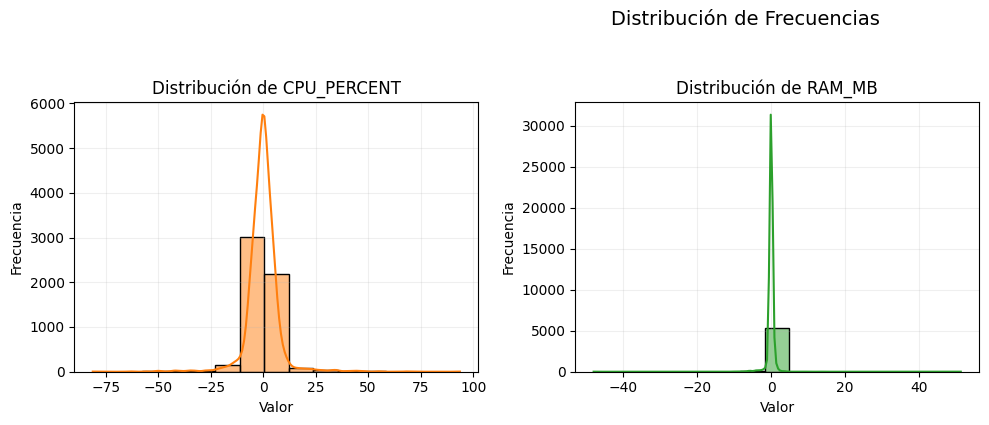

In [7]:
plt.figure(figsize=(15, 4))
plt.suptitle('Distribución de Frecuencias', y=1.05, fontsize=14)

for i, col in enumerate(['cpu_percent', 'ram_mb'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(nuevo_df[col], kde=True, color=f'C{i}', bins=15)
    plt.title(f'Distribución de {col.upper()}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

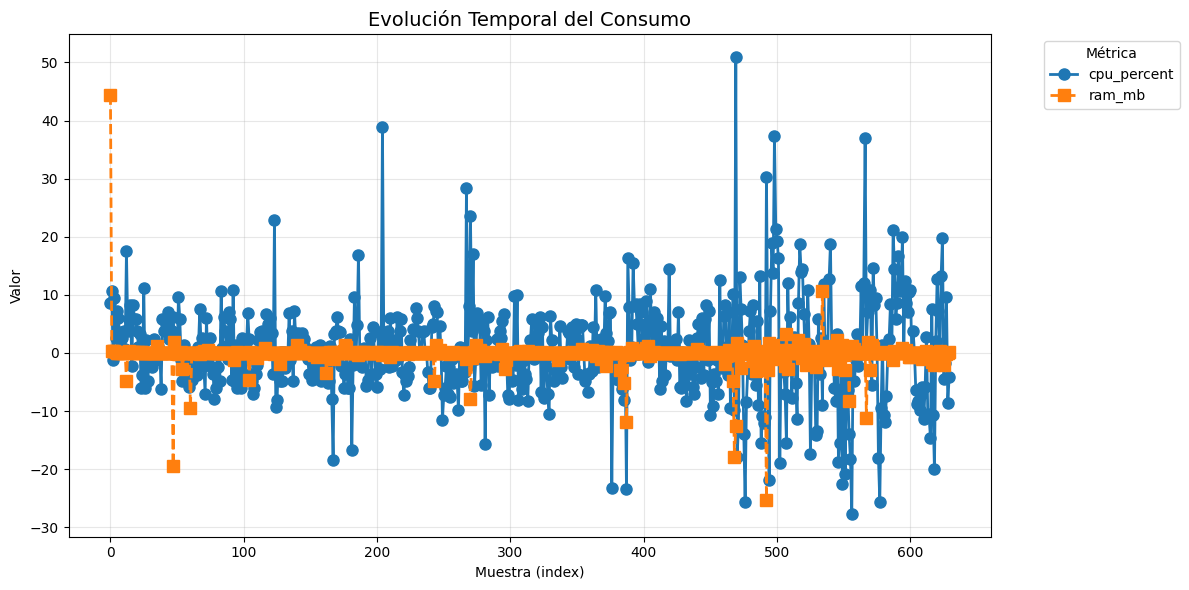

In [10]:
plt.figure(figsize=(12, 6))
nuevo_df.reset_index().plot(x='index', y=['cpu_percent', 'ram_mb'], 
                              style=['-o', '--s', ':^'],
                              markersize=8,
                              linewidth=2,
                              figsize=(12, 6))

plt.title('Evolución Temporal del Consumo', fontsize=14)
plt.xlabel('Muestra (index)')
plt.ylabel('Valor')
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()